In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/Users/ken/deep_learning_practice/dogs-vs-cats/'

In [3]:
base_dir = '/Users/ken/deep_learning_practice/cats_and_dogs_small'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [6]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [10]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

FileExistsError: [Errno 17] File exists: '/Users/ken/deep_learning_practice/cats_and_dogs_small/validation/cats'

In [9]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [11]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [19]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

1000
1000


In [20]:
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

500
500


In [21]:
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

500
500


In [22]:
from keras import models, layers

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [27]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [28]:
#converting images into tensors

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50
                             )

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 70s 697ms/step - loss: 0.6948 - acc: 0.5143 - val_loss: 0.6813 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 109s 1s/step - loss: 0.6625 - acc: 0.6006 - val_loss: 0.7009 - val_acc: 0.5410
Epoch 3/30
100/100 [==============================] - 99s 989ms/step - loss: 0.6287 - acc: 0.6380 - val_loss: 0.6527 - val_acc: 0.5970
Epoch 4/30
100/100 [==============================] - 97s 971ms/step - loss: 0.5906 - acc: 0.6855 - val_loss: 0.6185 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 91s 909ms/step - loss: 0.5446 - acc: 0.7276 - val_loss: 0.5695 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 88s 883ms/step - loss: 0.5175 - acc: 0.7404 - val_loss: 0.5673 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 84s 838ms/step - loss: 0.4988 - acc: 0.7604 - val_loss: 0.5634 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 83s

In [30]:
model.save('cats_and_dogs_small_1.h5')

In [31]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

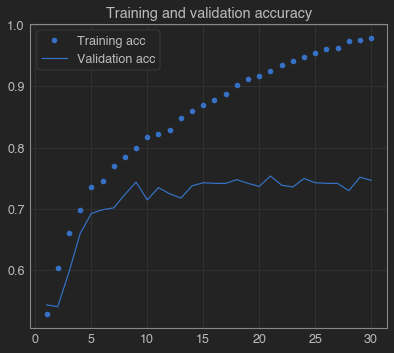

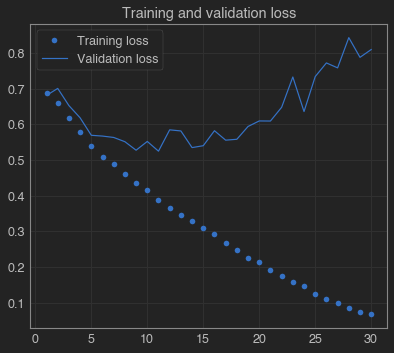

In [32]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

